#  In this Notebook we are going a built a Machine Learning Model.

# This Model will help in pwhiteicting the Loan Eligibility of the Customer.

### Loan Pwhiteiction system -

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [6]:
df = pd.read_csv('Bank_Cwhiteit_Data ( Kaggle ).csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Cwhiteit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Cwhiteit History,Months since last delinquent,Number of Open Accounts,Number of Cwhiteit Problems,Current Cwhiteit Balance,Maximum Open Cwhiteit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
df.shape

(100514, 19)

In [8]:
df.describe()

,Current Loan Amount,Cwhiteit Score,Annual Income,Monthly Debt,Years of Cwhiteit History,Months since last delinquent,Number of Open Accounts,Number of Cwhiteit Problems,Current Cwhiteit Balance,Maximum Open Cwhiteit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Cwhiteit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Cwhiteit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-

In [10]:
def missing_values(mv):
    Num_null_values = mv.isnull().sum()
    return Num_null_values

In [11]:
missing_values(df)

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Cwhiteit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Cwhiteit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Cwhiteit Problems         514
Current Cwhiteit Balance            514
Maximum Open Cwhiteit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [12]:
df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [13]:
df.drop(['Loan ID','Years in current job','Customer ID'],axis = 1 , inplace = True)

In [14]:
missing_values(df)

Loan Status                       514
Current Loan Amount               514
Term                              514
Cwhiteit Score                    19668
Annual Income                   19668
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Cwhiteit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Cwhiteit Problems         514
Current Cwhiteit Balance            514
Maximum Open Cwhiteit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [15]:
df.head()

,Loan Status,Current Loan Amount,Term,Cwhiteit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Cwhiteit History,Months since last delinquent,Number of Open Accounts,Number of Cwhiteit Problems,Current Cwhiteit Balance,Maximum Open Cwhiteit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [16]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage', nan],
      dtype=object)

In [17]:
df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

In [18]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [19]:
df['Term'].unique()

array(['Short Term', 'Long Term', nan], dtype=object)

In [20]:
df.drop(['Purpose'],axis = 1 , inplace = True)

In [21]:
df

,Loan Status,Current Loan Amount,Term,Cwhiteit Score,Annual Income,Home Ownership,Monthly Debt,Years of Cwhiteit History,Months since last delinquent,Number of Open Accounts,Number of Cwhiteit Problems,Current Cwhiteit Balance,Maximum Open Cwhiteit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,Home Mortgage,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,Home Mortgage,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,Own Home,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,Own Home,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,Rent,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df['Loan Status'].isnull().sum()

514

In [23]:
df.dropna(subset = ['Loan Status'],inplace = True)

In [24]:
missing_values(df)

Loan Status                         0
Current Loan Amount                 0
Term                                0
Cwhiteit Score                    19154
Annual Income                   19154
Home Ownership                      0
Monthly Debt                        0
Years of Cwhiteit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Cwhiteit Problems           0
Current Cwhiteit Balance              0
Maximum Open Cwhiteit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [25]:
df

,Loan Status,Current Loan Amount,Term,Cwhiteit Score,Annual Income,Home Ownership,Monthly Debt,Years of Cwhiteit History,Months since last delinquent,Number of Open Accounts,Number of Cwhiteit Problems,Current Cwhiteit Balance,Maximum Open Cwhiteit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,Home Mortgage,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,Home Mortgage,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,Own Home,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,Own Home,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,Rent,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,Own Home,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,Rent,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,Rent,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,Rent,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [26]:
sns.heatmap(df.isnull(), cbar = False,cmap = 'viridis')

<AxesSubplot:>

In [27]:
df.drop('Months since last delinquent',inplace = True , axis = 1)
df

,Loan Status,Current Loan Amount,Term,Cwhiteit Score,Annual Income,Home Ownership,Monthly Debt,Years of Cwhiteit History,Number of Open Accounts,Number of Cwhiteit Problems,Current Cwhiteit Balance,Maximum Open Cwhiteit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,Home Mortgage,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,Home Mortgage,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,Own Home,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,Own Home,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,Rent,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,Own Home,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,Rent,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,Rent,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,Rent,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [28]:
missing_values(df)

Loan Status                      0
Current Loan Amount              0
Term                             0
Cwhiteit Score                 19154
Annual Income                19154
Home Ownership                   0
Monthly Debt                     0
Years of Cwhiteit History          0
Number of Open Accounts          0
Number of Cwhiteit Problems        0
Current Cwhiteit Balance           0
Maximum Open Cwhiteit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [29]:
df['Bankruptcies'].unique()

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

In [30]:
df['Tax Liens'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [31]:
df['Maximum Open Cwhiteit'].unique()

array([ 416746.,  850784.,  750090., ..., 1287792., 2299198.,  892606.])

In [32]:
N_cols = df[['Cwhiteit Score','Annual Income','Bankruptcies','Tax Liens','Maximum Open Cwhiteit']]
for i in N_cols:
    df[i].fillna(df[i].mean(axis = 0) , inplace = True)

In [33]:
missing_values(df)

Loan Status                  0
Current Loan Amount          0
Term                         0
Cwhiteit Score                 0
Annual Income                0
Home Ownership               0
Monthly Debt                 0
Years of Cwhiteit History      0
Number of Open Accounts      0
Number of Cwhiteit Problems    0
Current Cwhiteit Balance       0
Maximum Open Cwhiteit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [34]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [35]:
def bar_chart(col):
    Approved = df[df['Loan Status'] == 'Fully Paid'][col].value_counts()
    Disapproved = df[df['Loan Status'] == 'Charged Off'][col].value_counts()
    
    df1 = pd.DataFrame([Approved,Disapproved])
    df1.index = ['Approved' , 'Disapproved']
    df1.plot(kind = 'bar')

In [36]:
#%matplotlib inline

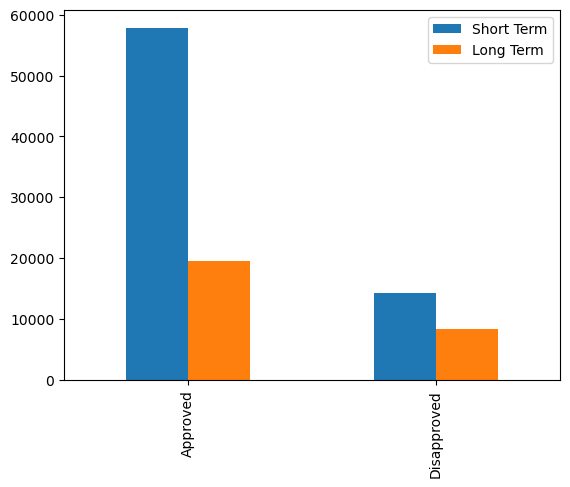

In [37]:
bar_chart('Term')

In [38]:
bar_chart('Home Ownership')

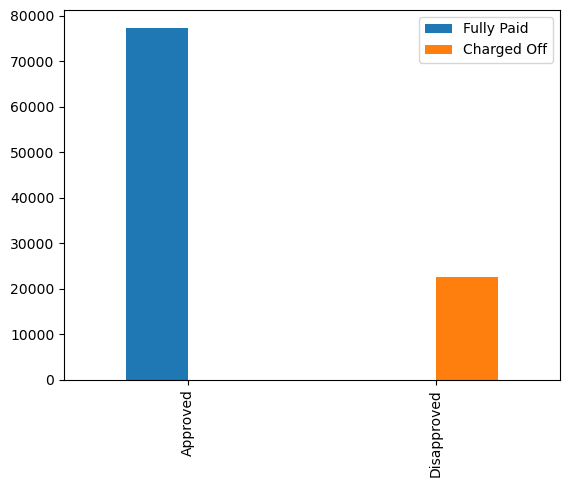

In [39]:
bar_chart('Loan Status')

In [40]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

df[['Loan Status','Term','Home Ownership']] = ord_enc.fit_transform(df[['Loan Status','Term','Home Ownership']])
df.head()

,Loan Status,Current Loan Amount,Term,Cwhiteit Score,Annual Income,Home Ownership,Monthly Debt,Years of Cwhiteit History,Number of Open Accounts,Number of Cwhiteit Problems,Current Cwhiteit Balance,Maximum Open Cwhiteit,Bankruptcies,Tax Liens
0,1.0,445412.0,1.0,709.000000,1.167493e+06,1.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,1.0,1076.456089,1.378277e+06,1.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,1.0,741.000000,2.231892e+06,2.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,0.0,721.000000,8.069490e+05,2.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,1.0,1076.456089,1.378277e+06,3.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [41]:
df[['Loan Status','Term','Home Ownership']] = df[['Loan Status','Term','Home Ownership']].astype('int')

In [42]:
df

,Loan Status,Current Loan Amount,Term,Cwhiteit Score,Annual Income,Home Ownership,Monthly Debt,Years of Cwhiteit History,Number of Open Accounts,Number of Cwhiteit Problems,Current Cwhiteit Balance,Maximum Open Cwhiteit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.000000,1.167493e+06,1,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,1076.456089,1.378277e+06,1,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.000000,2.231892e+06,2,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.000000,8.069490e+05,2,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,1076.456089,1.378277e+06,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,147070.0,1,725.000000,4.754370e+05,2,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1,99999999.0,1,732.000000,1.289416e+06,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,1,103136.0,1,742.000000,1.150545e+06,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,1,530332.0,1,746.000000,1.717524e+06,3,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [43]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = 'viridis')

<AxesSubplot:>

In [44]:
X = df.drop('Loan Status',axis = 1)
y = df['Loan Status']

## Finding Best Random State Number

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## The Best Random State Number is 76

In [46]:
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 76)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 13)
(80000,)
(20000, 13)
(20000,)


In [48]:
from sklearn.naive_bayes import GaussianNB
GNB_Model = GaussianNB()
GNB_Model.fit(X_train,y_train)

ypwhite_train = GNB_Model.pwhiteict(X_train)
ypwhite_test = GNB_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(GNB_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  0.345475
Test Accuracy Score :  0.33815

Train Recall Score :  0.1530453647637859
Test Recall Score :  0.15171529336325745

Train Precision Score :  0.9948431909071774
Test Precision Score :  0.9966301600673968

Cross Validation Score :  0.34530999999999995


## Logistic Regression Algorithm with Default Parameters

In [49]:
from sklearn.linear_model import LogisticRegression
LOG_Model = LogisticRegression()
LOG_Model.fit(X_train,y_train)

ypwhite_train = LOG_Model.pwhiteict(X_train)
ypwhite_test = LOG_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(LOG_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  0.81295
Test Accuracy Score :  0.82255

Train Recall Score :  0.9933296635689538
Test Recall Score :  0.9939083039435717

Train Precision Score :  0.8082891997997523
Test Precision Score :  0.8177693362878548

Cross Validation Score :  0.8150599999999999


## Hyperparameter Tuning ( LRA )

In [68]:
param_grid = [{
    'penalty' : ['l1' , 'l2' , 'elasticnet' , 'none'],
    'C' : np.logspace(-4 , 4 , 20),
    'solver' : ['lbfgs' , 'newton-cg' , 'liblinear' , 'sag' , 'saga'],
    'max_iter' : [100 , 1000 , 2500 , 5000]
     }
]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LOG_Model , param_grid = param_grid , cv = 3 , verbose = True , n_jobs = -1)
best_clf = clf.fit(X,y)
best_clf.best_params_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


{'C': 0.004832930238571752,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

## Logistic Regression Algorithm with Hyperparameter Tuning

In [50]:
from sklearn.linear_model import LogisticRegression
LOG_Model = LogisticRegression(C = 0.004832930238571752,
max_iter = 100,
penalty = 'l1',
solver= 'liblinear')
LOG_Model.fit(X_train,y_train)

ypwhite_train = LOG_Model.pwhiteict(X_train)
ypwhite_test = LOG_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(LOG_Model,X,y,cv = 5)).mean())

LRA_Train = accuracy_score(y_train,ypwhite_train)
LRA_Test = accuracy_score(y_test,ypwhite_test)

Train Accuracy Score :  0.8172875
Test Accuracy Score :  0.8262

Train Recall Score :  0.9999676197260629
Test Recall Score :  0.9999358768836165

Train Precision Score :  0.8086515927152751
Test Precision Score :  0.8177670564791022

Cross Validation Score :  0.8190500000000001


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypwhite_test)

array([[  930,  3475],
       [    1, 15594]], dtype=int64)

In [52]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LOG_Model,X_test,y_test)
plt.show()

## KNN Algorithm with Default Parameters

In [53]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train,y_train)

ypwhite_train = KNN_Model.pwhiteict(X_train)
ypwhite_test = KNN_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(KNN_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  0.80725
Test Accuracy Score :  0.73855

Train Recall Score :  0.9517533918336949
Test Recall Score :  0.9048412952869509

Train Precision Score :  0.8253446775054053
Test Precision Score :  0.790266577060932

Cross Validation Score :  0.7366


## Hyperparameter Tuning ( KNN )

In [64]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,31,2)),'p':[1,2]}

cv_classifier = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')
cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 29, 'p': 1}

## KNN Algorithm with Hyperparameter Tuning

In [53]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier(n_neighbors = 29, p = 1)
KNN_Model.fit(X_train,y_train)

ypwhite_train = KNN_Model.pwhiteict(X_train)
ypwhite_test = KNN_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(KNN_Model,X,y,cv = 5)).mean())

KNN_Train = accuracy_score(y_train,ypwhite_train)
KNN_Test = accuracy_score(y_test,ypwhite_test)

Train Accuracy Score :  0.77385
Test Accuracy Score :  0.77815

Train Recall Score :  0.9924230158987145
Test Recall Score :  0.9905097787752485

Train Precision Score :  0.7766909100124173
Test Precision Score :  0.7826813944061614

Cross Validation Score :  0.7716700000000001


## Decision Tree Algorithm with Default Parameters

In [54]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train,y_train)

ypwhite_train = DT_Model.pwhiteict(X_train)
ypwhite_test = DT_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(DT_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  1.0
Test Accuracy Score :  0.75485

Train Recall Score :  1.0
Test Recall Score :  0.8415517794164796

Train Precision Score :  1.0
Test Precision Score :  0.8436616096682952

Cross Validation Score :  0.75369


## Hyperparameter Tuning ( DTC )

In [63]:
from sklearn.model_selection import GridSearchCV as GSCV

estimator = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5],
             'random_state' : list(range(1,100))}

grid = GSCV(estimator,param_grid,scoring = 'accuracy',cv = 5)

grid.fit(X_train,y_train)

grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=1)

## Decision Tree Classifier with Hyperparameter Tuning

In [54]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(max_depth = 1, random_state = 1)
DT_Model.fit(X_train,y_train)

ypwhite_train = DT_Model.pwhiteict(X_train)
ypwhite_test = DT_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(DT_Model,X,y,cv = 5)).mean())

DTC_Train = accuracy_score(y_train,ypwhite_train)
DTC_Test = accuracy_score(y_test,ypwhite_test)

Train Accuracy Score :  0.8173375
Test Accuracy Score :  0.82625

Train Recall Score :  1.0
Test Recall Score :  1.0

Train Precision Score :  0.8086777779232511
Test Precision Score :  0.8177766124803356

Cross Validation Score :  0.8191200000000001


## Random Forest Algorithm with Default Parameters

In [55]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier()
RF_Model.fit(X_train,y_train)

ypwhite_train = RF_Model.pwhiteict(X_train)
ypwhite_test = RF_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(RF_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  0.999975
Test Accuracy Score :  0.82645

Train Recall Score :  1.0
Test Recall Score :  0.9870471304905418

Train Precision Score :  0.9999676207745111
Test Precision Score :  0.8248312078019505

Cross Validation Score :  0.8181800000000001


## Hyperparameter Tuning ( RFClassifier )

In [73]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier(random_state = 0)

param_grid = {'n_estimators':[100,200,300],
             'max_features' : ['auto' , 'sqrt'],
             'bootstrap':[True , False]}

grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)

grid.fit(X_train,y_train)

grid.best_estimator_

RandomForestClassifier(n_estimators=300, random_state=0)

## Random Forest Classifier with Hyperparameter Tuning

In [55]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(n_estimators=300, random_state=0)
RF_Model.fit(X_train,y_train)

ypwhite_train = RF_Model.pwhiteict(X_train)
ypwhite_test = RF_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(RF_Model,X,y,cv = 5)).mean())

RFC_Train = accuracy_score(y_train,ypwhite_train)
RFC_Test = accuracy_score(y_test,ypwhite_test)

Train Accuracy Score :  1.0
Test Accuracy Score :  0.82665

Train Recall Score :  1.0
Test Recall Score :  0.9895479320294966

Train Precision Score :  1.0
Test Precision Score :  0.8236549957301452

Cross Validation Score :  0.8185499999999999


## AdaBoost Classifier with Default Parameters

In [56]:
from sklearn.ensemble import AdaBoostClassifier
AB_Model = AdaBoostClassifier()
AB_Model.fit(X_train,y_train)

ypwhite_train = AB_Model.pwhiteict(X_train)
ypwhite_test = AB_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(AB_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  0.8173125
Test Accuracy Score :  0.82615

Train Recall Score :  0.9990609720558236
Test Recall Score :  0.9991022763706316

Train Precision Score :  0.8091260735592998
Test Precision Score :  0.818157950010502

Cross Validation Score :  0.81907


## Hyperparameter Tuning ( ABClasifier )

In [70]:
from sklearn.model_selection import GridSearchCV

estimator = AdaBoostClassifier()

param_grid = {'n_estimators': list(range(1,51))}

grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 27}

## AdaBoost Classifier with Hyperparameter Tuning

In [56]:
from sklearn.ensemble import AdaBoostClassifier
AB_Model = AdaBoostClassifier(n_estimators = 27)
AB_Model.fit(X_train,y_train)

ypwhite_train = AB_Model.pwhiteict(X_train)
ypwhite_test = AB_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(AB_Model,X,y,cv = 5)).mean())

ABC_Train = accuracy_score(y_train,ypwhite_train)
ABC_Test = accuracy_score(y_test,ypwhite_test)

Train Accuracy Score :  0.8173375
Test Accuracy Score :  0.8263

Train Recall Score :  0.9999190493151572
Test Recall Score :  0.9999358768836165

Train Precision Score :  0.8087181971742461
Test Precision Score :  0.8178528347406514

Cross Validation Score :  0.81922


## Gradient Boosting Classifier with Default Parameters

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
GB_Model = GradientBoostingClassifier()
GB_Model.fit(X_train,y_train)

ypwhite_train = GB_Model.pwhiteict(X_train)
ypwhite_test = GB_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(GB_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  0.8178625
Test Accuracy Score :  0.82665

Train Recall Score :  0.9989476410970437
Test Recall Score :  0.9989740301378647

Train Precision Score :  0.8096500321492777
Test Precision Score :  0.8186547556489753

Cross Validation Score :  0.81936


## Hyperparameter Tuning ( GBClasifier )

In [71]:
from sklearn.model_selection import GridSearchCV

estimator = GradientBoostingClassifier()

param_grid = {'n_estimators':[1,5,10,20,40,100],
             'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]}

grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_params_)

grid.best_estimator_

{'learning_rate': 0.1, 'n_estimators': 100}


GradientBoostingClassifier()

## Gradient Boosting Classifier with Hyperparameter Tuning

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
GB_Model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100)
GB_Model.fit(X_train,y_train)

ypwhite_train = GB_Model.pwhiteict(X_train)
ypwhite_test = GB_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(GB_Model,X,y,cv = 5)).mean())

GBC_Train = accuracy_score(y_train,ypwhite_train)
GBC_Test = accuracy_score(y_test,ypwhite_test)

Train Accuracy Score :  0.8178625
Test Accuracy Score :  0.82665

Train Recall Score :  0.9989476410970437
Test Recall Score :  0.9989740301378647

Train Precision Score :  0.8096500321492777
Test Precision Score :  0.8186547556489753

Cross Validation Score :  0.81936


## XGB Classifier with Default Parameters

In [58]:
from xgboost import XGBClassifier
XGB_Model = XGBClassifier()
XGB_Model.fit(X_train,y_train)

ypwhite_train = XGB_Model.pwhiteict(X_train)
ypwhite_test = XGB_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(XGB_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  0.8331625
Test Accuracy Score :  0.82595

Train Recall Score :  0.9946734449373442
Test Recall Score :  0.9876883616543765

Train Precision Score :  0.825156134577933
Test Precision Score :  0.8240423710678365

Cross Validation Score :  0.81868


## Hyperparameter Tuning ( XGBClassifier )

In [67]:
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier()

param_grid = {'n_estimators':[10,20,40,100],
             'max_depth':[3,4,5],
             'gamma':[0,0.15,0.3,0.5,1]}

grid = GridSearchCV(XGB_Model,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(X_train,y_train)

grid.best_params_

{'gamma': 1, 'max_depth': 4, 'n_estimators': 40}

## XGB Classifier with Hyperparameter Tuning

In [62]:
from xgboost import XGBClassifier
XGB_Model = XGBClassifier(gamma = 1, max_depth = 4, n_estimators = 40)
XGB_Model.fit(X_train,y_train)

ypwhite_train = XGB_Model.pwhiteict(X_train)
ypwhite_test = XGB_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(XGB_Model,X,y,cv = 5)).mean())

XGB_Train = accuracy_score(y_train,ypwhite_train)
XGB_Test = accuracy_score(y_test,ypwhite_test)

Train Accuracy Score :  0.8185125
Test Accuracy Score :  0.8261

Train Recall Score :  0.9979924230158987
Test Recall Score :  0.9978198140429625

Train Precision Score :  0.8106842721306732
Test Precision Score :  0.8187845303867404

Cross Validation Score :  0.81928


## Support Vector Machine with Default Parameters

In [59]:
from sklearn.svm import SVC
SVM_Model = SVC()
SVM_Model.fit(X_train,y_train)

ypwhite_train = SVM_Model.pwhiteict(X_train)
ypwhite_test = SVM_Model.pwhiteict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy Score : ',accuracy_score(y_train,ypwhite_train))
print('Test Accuracy Score : ',accuracy_score(y_test,ypwhite_test))
print()

from sklearn.metrics import recall_score
print('Train Recall Score : ',recall_score(y_train,ypwhite_train))
print('Test Recall Score : ',recall_score(y_test,ypwhite_test))
print()

from sklearn.metrics import precision_score
print('Train Precision Score : ',precision_score(y_train,ypwhite_train))
print('Test Precision Score : ',precision_score(y_test,ypwhite_test))
print()

from sklearn.model_selection import cross_val_score
print('Cross Validation Score : ',(cross_val_score(SVM_Model,X,y,cv = 5)).mean())

Train Accuracy Score :  0.7721
Test Accuracy Score :  0.77975

Train Recall Score :  1.0
Test Recall Score :  1.0

Train Precision Score :  0.7720943023575589
Test Precision Score :  0.77975

Cross Validation Score :  0.77361


## Hyperparameter Tuning ( SVM )

In [3]:
a = 'Hi Krishna , Good morning , Everything is fine Now and Completed the GridSearch CV process for all Algorithms sucessfully'
print(a)

Hi Krishna , Good morning , Everything is fine Now and Completed the GridSearch CV process for all Algorithms sucessfully


In [73]:
Accuracies = pd.DataFrame({'Train Score':[LRA_Train,KNN_Train,DTC_Train,RFC_Train,ABC_Train,XGB_Train,GBC_Train],
                         'Test Score':[LRA_Test,KNN_Test,DTC_Test,RFC_Test,ABC_Test,XGB_Test,GBC_Test]},
                           index = ['LRA','KNN','DTC','RFC','ABC','XGB','GBC'])

In [74]:
Accuracies

,Train Score,Test Score
LRA,0.817287,0.82620
KNN,0.773850,0.77815
DTC,0.817338,0.82625
RFC,1.000000,0.82665
ABC,0.817338,0.82630
XGB,0.818512,0.82610
GBC,0.817863,0.82665


# Gradient Boosting Classifier is the Best Algorithm among all Algorithms

In [86]:
import joblib
joblib.dump(GB_Model , 'Model.pkl')

['Model.pkl']

In [87]:
model = joblib.load('Model.pkl')